In [27]:
import trackpy
import pims
import matplotlib.pyplot as plt
import pandas as pd
import os
## Beta Please
## Himi Microscope
## I have assumed that you are smart person who can change the Variables appropriately
## Since i was getting a lot of corrupted tag error when using a tiff file which made me want to throw away my laptop
## i opened fiji and converted the video into png sequences.
## But hey, world is your oyster, I'm just living in it.



In [2]:
dir = '/home/himanshu/Keema/HS'
## My frames of video are saved using followign names "C9 HSc i" where i is the ith frame
## to extract all the frame i just use the *, which means dont care what's here, so it will 
## look for files with C9 HSc in the beginning and .png in the end
fname = os.path.join(dir,'C9 HSc*.png')
frame = pims.open(fname)
len(frame)
## Exactly

2000

In [3]:
df = trackpy.locate(frame[0], diameter = (3,7), separation = 22)

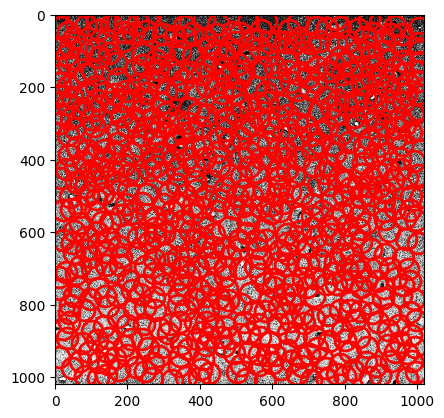

<Axes: >

In [4]:
df.head()
trackpy.annotate(df, frame[0])
## baap re


### Beta check the histogram for mass size and tweak the mass threshold appropiately

(array([ 42., 197., 296., 147.,  30.,  10.,   8.,   4.,   5.,   2.]),
 array([12274.07899894, 16283.33063791, 20292.58227689, 24301.83391586,
        28311.08555484, 32320.33719381, 36329.58883279, 40338.84047176,
        44348.09211074, 48357.34374971, 52366.59538869]),
 <BarContainer object of 10 artists>)

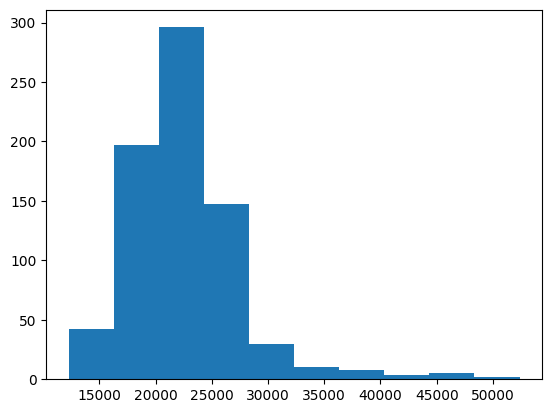

In [5]:
plt.hist(df['mass'])

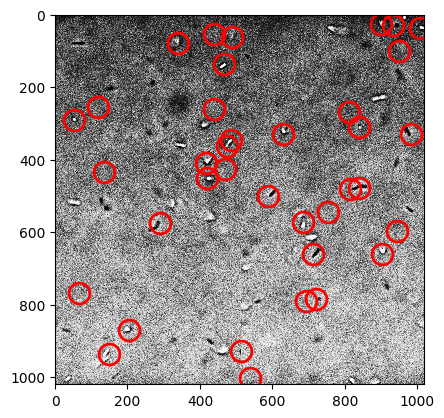

In [6]:
minmass =30000
## I set the minimum separation to 22 because if i lowered it
## my pc would cry
df = trackpy.locate(frame[70], diameter = (3,7), separation = 22, minmass = minmass)
df.head()
trackpy.annotate(df, frame[70]);

In [7]:
dfs = trackpy.batch(frame[:2000], diameter = (5,7), separation = 22, minmass = minmass)

Frame 1999: 709 features


In [8]:
dfs = dfs.dropna()

In [9]:
## Features now get converted to trajectories OwO

trajs = trackpy.link(dfs, 7, memory=3)

Frame 1999: 625 trajectories present.


In [10]:
## filter out spurious trajectories with less than 25 points
print('Before:', trajs['particle'].nunique())

trajs= trackpy.filter_stubs(trajs, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('After:', trajs['particle'].nunique())

Before: 776303
After: 520


## From here I am just shamelessly copying digital sreeni's tutorial

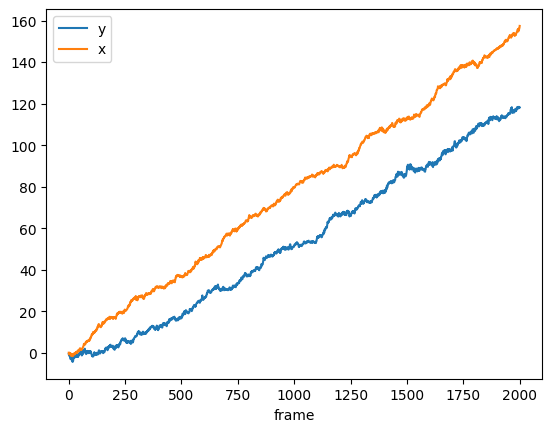

In [11]:
## computing drift 
d = trackpy.compute_drift(trajs)
d.plot()
## Remove drift

trajs_drift_removed = trackpy.subtract_drift(trajs.copy(), d) 


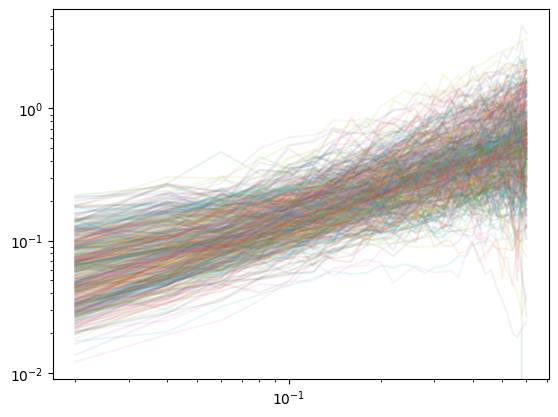

In [24]:
## There seems to be index level and column label ambiguity if I don;t run the following.
trajs_drift_removed= trajs_drift_removed.rename(columns={'particle':'Particle'})

fps = 1/0.02 #sec # to be set later
micron_per_pixel = 0.1135000# check in fiji
msd = trackpy.imsd(trajs_drift_removed, mpp = micron_per_pixel, fps = fps, max_lagtime= 30 )
plt.plot(msd.index, msd, alpha = 0.1);
plt.xscale('log')
plt.yscale('log')

In [31]:
msd.head()

,0,1,107,189,218,462,801,1124,1174,1248,...,743453,746093,751522,753551,754226,754543,760613,760654,763594,764435
lag time [s],,,,,,,,,,,,,,,,,,,,,
0.02,0.087106,0.031303,0.036783,0.073311,0.048542,0.029971,0.096524,0.067770,0.099681,0.102618,...,0.029701,0.056566,0.097614,0.068782,0.072536,0.026372,0.042394,0.025021,0.060788,0.028606
0.04,0.103684,0.051833,0.054813,0.093030,0.048720,0.051148,0.140971,0.123256,0.107998,0.166988,...,0.050906,0.047636,0.140128,0.096642,0.076094,0.042515,0.080352,0.055717,0.084656,0.064206
0.06,0.124941,0.066759,0.076709,0.095910,0.069097,0.053629,0.175320,0.114517,0.132581,0.221209,...,0.074003,0.095003,0.113803,0.098881,0.112698,0.048920,0.097760,0.087588,0.072629,0.088600
0.08,0.139415,0.080617,0.097075,0.118468,0.086102,0.072388,0.225314,0.101507,0.188767,0.243755,...,0.121705,0.100890,0.168500,0.149845,0.126060,0.051268,0.121686,0.107227,0.084623,0.091917
0.10,0.133190,0.096087,0.118337,0.164532,0.100098,0.074546,0.238517,0.252395,0.215008,0.286485,...,0.154407,0.116291,0.168849,0.174854,0.156949,0.067443,0.152822,0.102081,0.113591,0.087791


In [30]:
## Saving into csv, but hey if you prefer .oogbooga format for storing the trajectories
## you can but i won't help
msd.to_csv('C9-HS-0.csv')
